In [1]:
!pip3 install numpy pandas scikit-learn tqdm matplotlib

In [2]:
import numpy as np
import pandas as pd
import re
from tqdm import tqdm
from sklearn.cluster import KMeans
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

# Dataset Pre-processing
asdashudhuiashidasidhasdh

In [3]:
    
def clean_text2(text):
    # Converti il testo in minuscolo
    text = text.lower()

    # Rimuovi i numeri
    text = re.sub(r'\d+', '', text)

    # Rimuovi i caratteri speciali e simboli (mantieni la virgola e rimuovi il singolo apice)
    text = re.sub(r"[^a-zA-Z\s,]", '', text)

    # Rimuovi gli spazi extra
    text = ' '.join(text.split())

    return text
    
def rimuovi_spazi(match):
    return match.group(0).replace(" ", "")

# Funzione per pulire il testo
def clean_text(text):
    # Rimuove gli spazi all'interno di ciascun valore
    text = text.replace(" ", "")
    # Implementa altre operazioni di pulizia del testo come preferisci
    return text.strip()


In [4]:
!pip install mysql-connector-python

In [5]:
df = pd.read_csv("manga.csv")

In [6]:
df.head()

,title,description,rating,year,tags,cover
0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,4.7,2021.0,"['BL', 'Manhua', 'Romance', 'Shounen-ai', 'Spo...",https://cdn.anime-planet.com/manga/primary/sal...
1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,4.7,2017.0,"['Action', 'Adventure', 'BL', 'Comedy', 'Manhu...",https://cdn.anime-planet.com/manga/primary/the...
2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...",4.7,2004.0,"['Action', 'Adventure', 'Horror', 'Mystery', '...",https://cdn.anime-planet.com/manga/primary/joj...
3,A Sign of Affection,"Yuki is a typical college student, whose world...",4.7,2019.0,"['Romance', 'Shoujo', 'Slice of Life', 'Disabi...",https://cdn.anime-planet.com/manga/primary/a-s...
4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...",4.7,2016.0,"['Mystery', 'Shounen', 'Detectives', 'England'...",https://cdn.anime-planet.com/manga/primary/mor...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70948 entries, 0 to 70947
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        70948 non-null  object 
 1   description  70917 non-null  object 
 2   rating       29871 non-null  float64
 3   year         70124 non-null  float64
 4   tags         70948 non-null  object 
 5   cover        70948 non-null  object 
dtypes: float64(2), object(4)
memory usage: 3.2+ MB


In [8]:
df.drop_duplicates(subset="title", inplace=True)

# Trova le righe in cui la feature del rating è mancante
righe_null_rating = df[df['rating'].isnull()]

# Assegna valori casuali nell'intervallo da 0.00 a 3.00 alle righe con rating mancante (ho già molti valori per
valori_casuali = np.random.uniform(low=0.00, high=3.00, size=len(righe_null_rating))
righe_null_rating['rating'] = valori_casuali

# Aggiorna il dataset originale con i nuovi valori del rating
df.update(righe_null_rating)

df['tags'] = df['tags'].apply(lambda x: re.sub(r"'([^']*)'", rimuovi_spazi, x))
df['tags'] = df['tags'].apply(clean_text2)
df.head(5)

/var/folders/wh/gt_jw40x4w316fdghjw6j_y80000gn/T/ipykernel_14480/3182481875.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  righe_null_rating['rating'] = valori_casuali


,title,description,rating,year,tags,cover
0,Salad Days (Tang LiuZang) - Part 2,The second season of Salad Days (Tang LiuZang).,4.7,2021.0,"bl, manhua, romance, shounenai, sports, webtoo...",https://cdn.anime-planet.com/manga/primary/sal...
1,The Master of Diabolism,As the grandmaster who founded the Demonic Sec...,4.7,2017.0,"action, adventure, bl, comedy, manhua, mystery...",https://cdn.anime-planet.com/manga/primary/the...
2,JoJo's Bizarre Adventure Part 7: Steel Ball Run,"Set in 1890, Steel Ball Run spotlights Gyro Ze...",4.7,2004.0,"action, adventure, horror, mystery, seinen, th...",https://cdn.anime-planet.com/manga/primary/joj...
3,A Sign of Affection,"Yuki is a typical college student, whose world...",4.7,2019.0,"romance, shoujo, sliceoflife, disability",https://cdn.anime-planet.com/manga/primary/a-s...
4,Moriarty the Patriot,"Before he was Sherlock’s rival, Moriarty fough...",4.7,2016.0,"mystery, shounen, detectives, england, europe,...",https://cdn.anime-planet.com/manga/primary/mor...


Effettuato one-hot-encoding dei tags

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
labels = vectorizer.fit_transform(df['tags'])

vectorizer.get_feature_names_out()

array(['abstract', 'abuse', 'acting', 'action', 'adaptedtoanime',
       'adultcouples', 'adultindustry', 'adventure', 'africa',
       'afterlife', 'agegap', 'agetransformation', 'aging', 'agriculture',
       'alcohol', 'alcoholism', 'aliceinwonderland', 'aliens',
       'allboysschool', 'allgirlsschool', 'america', 'amnesia',
       'amusementpark', 'ancientchina', 'androids', 'androphobia',
       'angels', 'animalabuse', 'animalcharacteristics',
       'animalprotagonists', 'animaltransformation', 'animeindustry',
       'anthologies', 'anthropomorphic', 'apartmentlife', 'apocalypse',
       'apprenticeship', 'archery', 'argentina', 'arrangedmarriage',
       'art', 'artschool', 'assassins', 'astronauts', 'astronomy',
       'australia', 'autobiographies', 'aviation', 'badminton', 'baking',
       'balletdancing', 'bar', 'bara', 'baseball', 'based',
       'basedonacardgame', 'basedonacartoon', 'basedonacomicbook',
       'basedonadoujinshi', 'basedonafairytale', 'basedonalightnov

In [10]:
X = pd.DataFrame(labels.toarray(), columns=vectorizer.get_feature_names_out())
X.head(5)

,abstract,abuse,acting,action,adaptedtoanime,adultcouples,adultindustry,adventure,africa,afterlife,...,writers,wuxia,xianxia,yakuza,yaoi,yaoihandsyndrome,youkai,yuri,zombies,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70939 entries, 0 to 70938
Columns: 584 entries, abstract to zoo
dtypes: int64(584)
memory usage: 316.1 MB


In [12]:
X.describe()

,abstract,abuse,acting,action,adaptedtoanime,adultcouples,adultindustry,adventure,africa,afterlife,...,writers,wuxia,xianxia,yakuza,yaoi,yaoihandsyndrome,youkai,yuri,zombies,zoo
count,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,...,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000,70939.000000
mean,0.000324,0.000056,0.003214,0.180155,0.035707,0.041571,0.001833,0.087639,0.000733,0.001212,...,0.006541,0.000775,0.002241,0.003228,0.145125,0.000804,0.003848,0.011221,0.004046,0.000324
std,0.018003,0.010619,0.056602,0.384319,0.185559,0.199608,0.042769,0.282771,0.027065,0.034797,...,0.080611,0.027834,0.047290,0.056725,0.352229,0.028335,0.061916,0.105334,0.063478,0.018003
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Principal Component Analysis (PCA)
Ridotto il numero di features considerate fino a mantenere circa il 95% dell'informazione totale. Numero di features totali dopo la PCA = 236 (inizialmente erano 707).

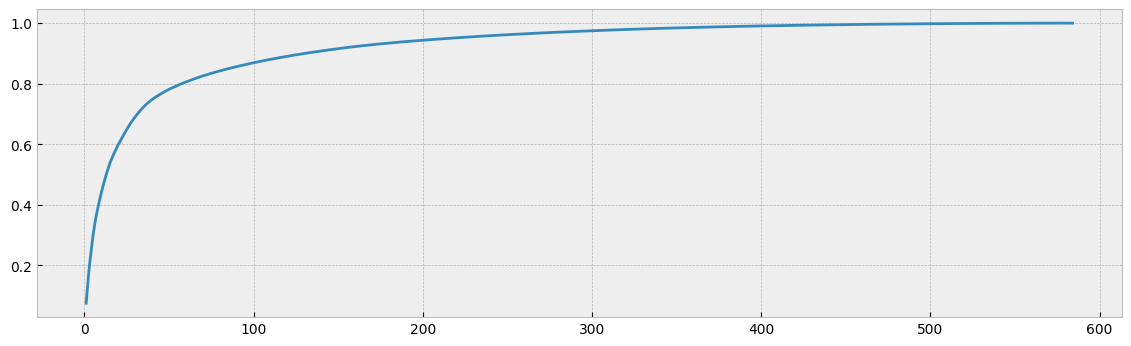

Number features: 215
Total Variance Explained: 0.9500943865410127


In [13]:
from sklearn.decomposition import PCA 

pca = PCA() 

# Fitting and Transforming the DF
df_pca = pca.fit_transform(X)

# Plotting to determine how many features should the dataset be reduced to
plt.style.use("bmh")
plt.figure(figsize=(14,4))
plt.plot(range(1,X.shape[1]+1), pca.explained_variance_ratio_.cumsum())
plt.show()

# Finding the exact number of features that explain at least 95% of the variance in the dataset
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance>=.95])
n_to_reach_95 = X.shape[1] - n_over_95

print(f"Number features: {n_to_reach_95}\nTotal Variance Explained: {total_explained_variance[n_to_reach_95]}")

In [14]:
X = X.iloc[:, :n_to_reach_95]
X

,abstract,abuse,acting,action,adaptedtoanime,adultcouples,adultindustry,adventure,africa,afterlife,...,fashion,fatedlovers,fencing,fetish,feudaljapan,filmcomic,finland,firefighters,fishing,foodandbeverage
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70934,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70935,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70936,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Clustering

In [15]:
!pip3 install yellowbrick seaborn setuptools

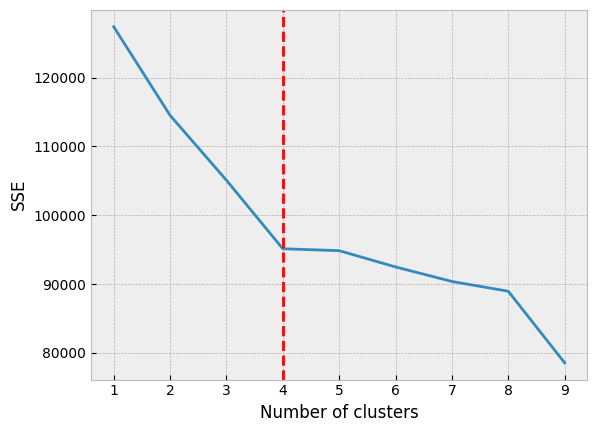

In [16]:
from sklearn.cluster import KMeans

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=42).fit(X)
    X["clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

# Calcola la derivata seconda della curva SSE
second_derivative = np.gradient(np.gradient(list(sse.values())))

# Trova l'indice del massimo della derivata seconda
optimal_k_index = np.argmax(second_derivative) + 1  # Aggiungi 1 perché l'indice inizia da 0

# Grafico del gomito
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")

# Indica il punto in cui avviene il "gomito"
plt.axvline(x=optimal_k_index, color='r', linestyle='--')

plt.show()

In [17]:
X.head(5)

,abstract,abuse,acting,action,adaptedtoanime,adultcouples,adultindustry,adventure,africa,afterlife,...,fatedlovers,fencing,fetish,feudaljapan,filmcomic,finland,firefighters,fishing,foodandbeverage,clusters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,6
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,8
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


# Cross Validation 

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import metrics


X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)
X_test.shape

(14188, 216)

# 4 cluster

In [19]:
kmeans_4 = KMeans(n_clusters=4, random_state=42, max_iter=1000)
# Compute k-means
kmeans_4.fit(X_train)
kmeans_4.fit_predict(X_train)
scores = cross_val_score(kmeans, X_test, cv=10)#valore migliore attuale: -1468
print(scores)
print(max(scores))

pred = cross_val_predict(kmeans, X_test,cv=10)#predizioni 
print(pred)
len(pred)

[-1669.9872439  -1560.36415485 -1777.3337603  -1608.98118104
 -1527.78740153 -1468.8115402  -1608.15135281 -1713.25119496
 -1770.75995116 -1646.58164411]
-1468.8115402021463
[4 6 6 ... 4 0 5]


14188

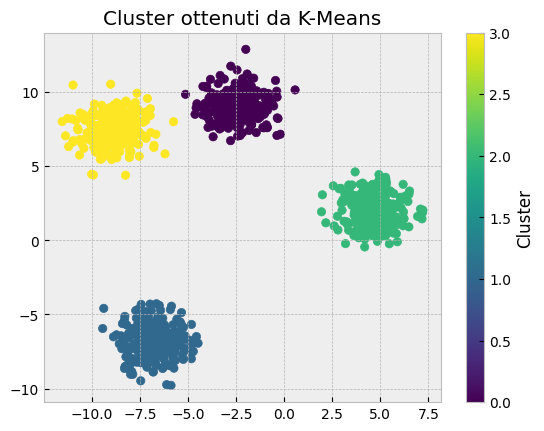

In [20]:
from sklearn.datasets import make_blobs

# Genera un set di dati casuali (blob)
X_blob, _ = make_blobs(n_samples=1000, centers=4, cluster_std=1.0, random_state=42)

kmeans_blob = KMeans(n_clusters=4, random_state=42, max_iter=1000)
# Addestra il modello K-Means sui dati generati
kmeans_blob.fit(X_blob)

# Assegna i cluster ai dati generati
labels_blob = kmeans_blob.predict(X_blob)

# Plot dei cluster
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=labels_blob, cmap='viridis')
plt.title('Cluster ottenuti da K-Means')
plt.colorbar(label='Cluster')
plt.show()

In [21]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

labels = kmeans_4.predict(X_test)
silhouette = silhouette_score(X_test,labels)
davies = davies_bouldin_score(X_test,labels)

print(silhouette)
print(davies)

0.37744084144674783
1.0963214857490438


# Salvare il modello

In [22]:
#import joblib

#filename = 'kmeans_best_model.sav'
#joblib.dump(kmeans_4, filename)

# 8 cluster

In [23]:
kmeans_8 = KMeans(n_clusters=8, random_state=42, max_iter=1000)
# Compute k-means
kmeans_8.fit(X_train)
kmeans_8.fit_predict(X_train)
scores = cross_val_score(kmeans_8, X_test, cv=10)#valore migliore attuale: -1575.9311996934612
print(scores)
print(max(scores))

pred = cross_val_predict(kmeans_8, X_test,cv=10)#predizioni 
print(pred)
len(pred)

[-1738.51755038 -1662.82575784 -1795.40809292 -1646.37838692
 -1659.36953615 -1575.93119969 -1706.53300368 -1824.24942898
 -1789.99793704 -1689.18489233]
-1575.9311996934612
[4 6 6 ... 4 0 5]


14188

# Silouhette  & Davies Score

In [24]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

labels = kmeans_8.predict(X_test)
silhouette = silhouette_score(X_test,labels)
davies = davies_bouldin_score(X_test,labels)

print(silhouette)
print(davies)

0.3520217797336636
1.2827546914921293
